<a href="https://colab.research.google.com/github/Simpush-43/MINI-PROJECT_POSTURE_RECOGNITION/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mediapipe opencv-python numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 19.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.6 which is incompatible.


Saving ChatGPT Image Mar 30, 2025, 11_51_38 PM.png to ChatGPT Image Mar 30, 2025, 11_51_38 PM.png
Uploaded file: ChatGPT Image Mar 30, 2025, 11_51_38 PM.png


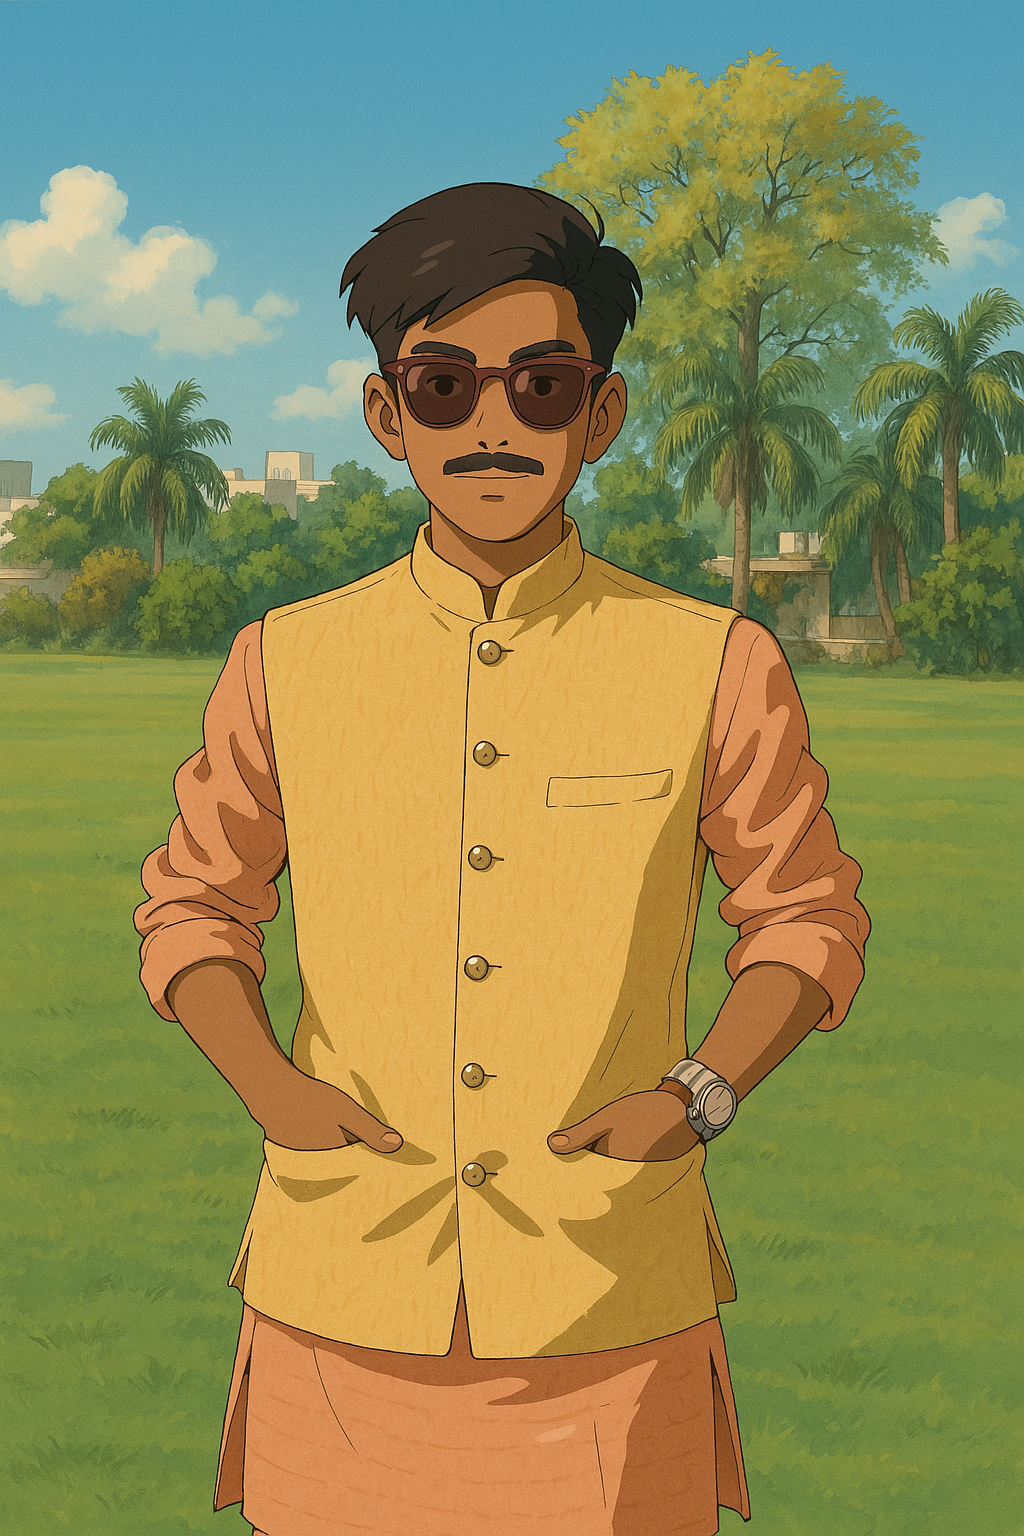

In [ ]:
from google.colab import files
import cv2
import numpy as np
from IPython.display import display
from PIL import Image

uploaded = files.upload()  # Upload an image

# Get file name
file_name = list(uploaded.keys())[0]
print(f"Uploaded file: {file_name}")

# Display the uploaded image
image = Image.open(file_name)
display(image)


In [ ]:
import cv2
import mediapipe as mp
import numpy as np

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

pose = mp_pose.Pose(static_image_mode=True)

# Function to calculate angles
def calculate_angle(a, b, c):
    a = np.array(a)  # First point
    b = np.array(b)  # Middle point
    c = np.array(c)  # Last point

    ba = a - b
    bc = c - b

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    return np.degrees(angle)

# Function to classify posture
def classify_posture(landmarks):
    if landmarks:
        # Get coordinates of key joints
        shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                    landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
        hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,
               landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
        knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,
                landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
        ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,
                 landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

        # Compute angles
        hip_knee_ankle_angle = calculate_angle(hip, knee, ankle)
        shoulder_hip_knee_angle = calculate_angle(shoulder, hip, knee)

        # Rule-based classification
        if hip_knee_ankle_angle < 90:
            return "Sitting"
        elif shoulder_hip_knee_angle > 160:
            return "Standing"
        else:
            return "Slouching"
    return "Unknown"

# Read uploaded image
image = cv2.imread(file_name)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Detect pose
result = pose.process(image_rgb)

if result.pose_landmarks:
    # Draw pose landmarks on the image
    mp_drawing.draw_landmarks(image, result.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    # Classify posture
    posture = classify_posture(result.pose_landmarks.landmark)
    cv2.putText(image, posture, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

# Convert image to RGB and display it
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
display(Image.fromarray(image_rgb))
print(f"Posture detected: {posture}")


NameError: name 'core' is not defined

In [ ]:
!pip install --upgrade mediapipe


In [ ]:
import cv2
import mediapipe as mp
import numpy as np

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

pose = mp_pose.Pose(static_image_mode=True)

# Function to calculate angles
def calculate_angle(a, b, c):
    a = np.array(a)  # First point
    b = np.array(b)  # Middle point
    c = np.array(c)  # Last point

    ba = a - b
    bc = c - b

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    return np.degrees(angle)

# Function to classify posture
def classify_posture(landmarks):
    if landmarks:
        # Get coordinates of key joints
        shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                    landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
        hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,
               landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
        knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,
                landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
        ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,
                 landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

        # Compute angles
        hip_knee_ankle_angle = calculate_angle(hip, knee, ankle)
        shoulder_hip_knee_angle = calculate_angle(shoulder, hip, knee)

        # Rule-based classification
        if hip_knee_ankle_angle < 90:
            return "Sitting"
        elif shoulder_hip_knee_angle > 160:
            return "Standing"
        else:
            return "Slouching"
    return "Unknown"

# Read uploaded image
image = cv2.imread(file_name)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Detect pose
result = pose.process(image_rgb)

if result.pose_landmarks:
    # Draw pose landmarks on the image
    mp_drawing.draw_landmarks(image, result.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    # Classify posture
    posture = classify_posture(result.pose_landmarks.landmark)
    cv2.putText(image, posture, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

# Convert image to RGB and display it
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
display(Image.fromarray(image_rgb))
print(f"Posture detected: {posture}")


NameError: name 'audio_classifier' is not defined

In [ ]:
import cv2
import mediapipe as mp
import numpy as np

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose(static_image_mode=True)

# Function to calculate angles (same as before)
def calculate_angle(a, b, c):
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)
    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)
    if angle > 180.0:
        angle = 360 - angle
    return angle

# Function to classify posture (simplified rule-based)
def classify_posture(landmarks):
    if landmarks:
        # Get coordinates of key joints
        shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                    landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
        hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,
               landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
        knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,
                landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
        ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,
                 landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

        # Calculate angles
        hip_angle = calculate_angle(shoulder, hip, knee)
        knee_angle = calculate_angle(hip, knee, ankle)

        # Basic rule-based classification
        if hip_angle > 160 and knee_angle > 160:
            return "Standing"
        elif hip_angle < 120 and knee_angle < 120:
            return "Sitting"
        else:
            return "Slouching"  # Default if not clearly standing or sitting
    return "Unknown"

# Load and process image (replace with your image path)
image = cv2.imread('your_image.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = pose.process(image_rgb)

# Classify posture and display results
if results.pose_landmarks:
    posture = classify_posture(results.pose_landmarks.landmark)
    print(f"Posture detected: {posture}")

    # Draw landmarks (optional)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
    cv2.imshow('Posture Detection', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Pose not detected in the image.")

NameError: name 'audio_classifier' is not defined

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image

# Upload an image
uploaded = files.upload()
file_name = list(uploaded.keys())[0]  # Get the uploaded file name

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose(static_image_mode=True)

# Function to calculate angles
def calculate_angle(a, b, c):
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)
    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)
    if angle > 180.0:
        angle = 360 - angle
    return angle

# Function to classify posture
def classify_posture(landmarks):
    if landmarks:
        # Get coordinates of key joints
        shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                    landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
        hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,
               landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
        knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,
                landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
        ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,
                 landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

        # Calculate angles
        hip_angle = calculate_angle(shoulder, hip, knee)
        knee_angle = calculate_angle(hip, knee, ankle)

        # Basic rule-based classification
        if hip_angle > 160 and knee_angle > 160:
            return "Standing"
        elif hip_angle < 120 and knee_angle < 120:
            return "Sitting"
        else:
            return "Slouching"  # Default if not clearly standing or sitting
    return "Unknown"

# Read the uploaded image
image = cv2.imread(file_name)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Detect pose
results = pose.process(image_rgb)

if results.pose_landmarks:
    # Classify posture
    posture = classify_posture(results.pose_landmarks.landmark)
    print(f"Posture detected: {posture}")

    # Draw landmarks
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    # Convert to RGB and display using matplotlib
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Posture: {posture}")
    plt.show()
else:
    print("Pose not detected in the image.")


NameError: name 'audio_classifier' is not defined

In [ ]:
!pip uninstall mediapipe -y
!pip install mediapipe


Found existing installation: mediapipe 0.10.21
Uninstalling mediapipe-0.10.21:
  Successfully uninstalled mediapipe-0.10.21
  Using cached mediapipe-0.10.21-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (9.7 kB)
Using cached mediapipe-0.10.21-cp311-cp311-manylinux_2_28_x86_64.whl (35.6 MB)


In [ ]:
import mediapipe as mp
print(mp.__version__)  # This should print a valid version like '0.10.9'


0.10.21


Saving test.jpeg to test.jpeg
Posture detected: Slouching


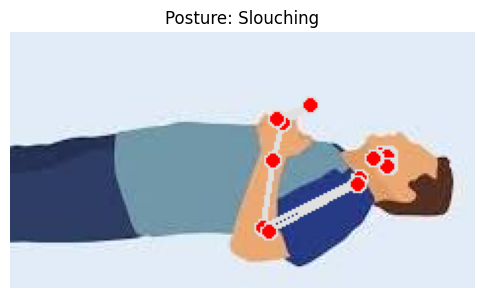

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image

# Upload an image
uploaded = files.upload()
file_name = list(uploaded.keys())[0]  # Get the uploaded file name

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose(static_image_mode=True)

# Function to calculate angles
def calculate_angle(a, b, c):
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)
    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)
    if angle > 180.0:
        angle = 360 - angle
    return angle

# Function to classify posture
def classify_posture(landmarks):
    if landmarks:
        # Get coordinates of key joints
        shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                    landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
        hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,
               landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
        knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,
                landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
        ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,
                 landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

        # Calculate angles
        hip_angle = calculate_angle(shoulder, hip, knee)
        knee_angle = calculate_angle(hip, knee, ankle)

        # Basic rule-based classification
        if hip_angle > 160 and knee_angle > 160:
            return "Standing"
        elif hip_angle < 120 and knee_angle < 120:
            return "Sitting"
        elif hip_angle > 140 and knee_angle > 140 and knee[1] > hip[1]:
            return "Lying Down"
        else:
            return "Slouching"  # Default if not clearly standing or sitting
    return "Unknown"

# Read the uploaded image
image = cv2.imread(file_name)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Detect pose
results = pose.process(image_rgb)

if results.pose_landmarks:
    # Classify posture
    posture = classify_posture(results.pose_landmarks.landmark)
    print(f"Posture detected: {posture}")

    # Draw landmarks
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    # Convert to RGB and display using matplotlib
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Posture: {posture}")
    plt.show()
else:
    print("Pose not detected in the image.")
